In [1]:
%load_ext autoreload 
%autoreload 2   

In [4]:
import matplotlib.pyplot as plt
import random
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
from tqdm import tqdm
from torchvision import models
import torchvision
import os

# from data import PermutedMNIST
# from utils import EWC, ewc_train, normal_train, test

In [ ]:
project_name = "naive_MNIST"
# cl_strategy, initial_exp = maybe_load_checkpoint(cl_strategy, "./0_checkpoint.pth")
if not os.path.exists(f"./results/{project_name}/"):
    os.makedirs(f"./results/{project_name}/")

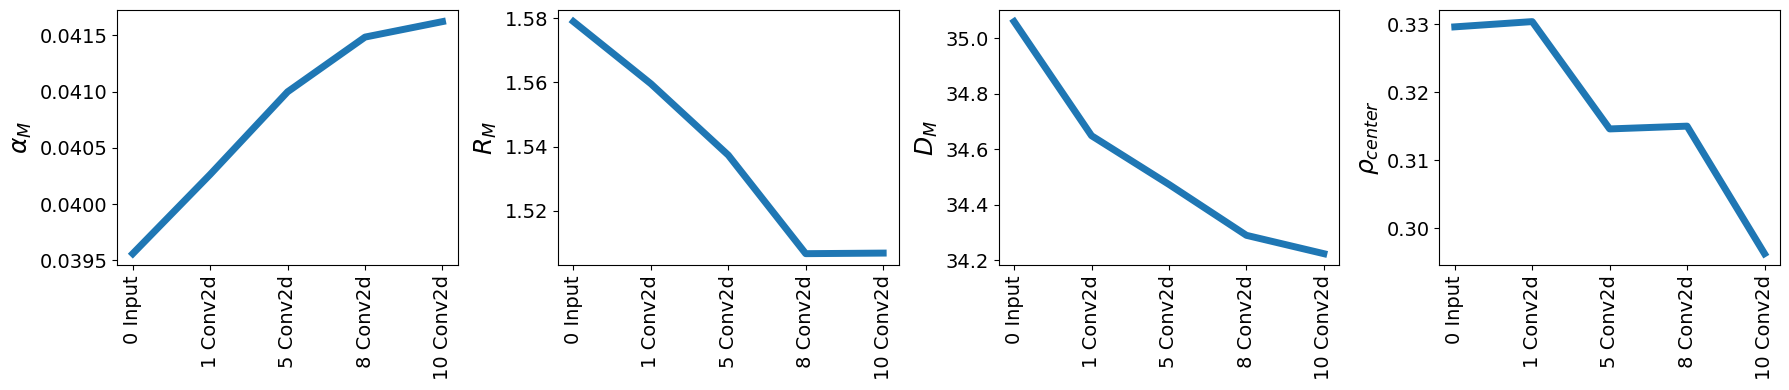

In [51]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

plot_data = torch.load("./plots/naive_CIFAR100/naive_CIFAR100_metrics.pth")["task_0"]

axes[0].plot(plot_data["capacities"], linewidth=5, label="task 0")
axes[1].plot(plot_data["radii"], linewidth=5)
axes[2].plot(plot_data["dimensions"], linewidth=5)
axes[3].plot(plot_data["correlations"], linewidth=5)

axes[0].set_ylabel(r"$\alpha_M$", fontsize=18)
axes[1].set_ylabel(r"$R_M$", fontsize=18)
axes[2].set_ylabel(r"$D_M$", fontsize=18)
axes[3].set_ylabel(r"$\rho_{center}$", fontsize=18)

names = plot_data["names"]
names = [n.split("_")[1] + " " + n.split("_")[2] for n in names]
for ax in axes:
    ax.set_xticks([i for i, _ in enumerate(names)])
    ax.set_xticklabels(names, rotation=90, fontsize=16)
    ax.tick_params(axis="both", which="major", labelsize=14)


# plot_data = torch.load("./plots/naive_CIFAR100/naive_CIFAR100_metrics.pth")["task_4"]


# axes[0].plot(plot_data["capacities"], linewidth=5, label="task 9")
# axes[1].plot(plot_data["radii"], linewidth=5)
# axes[2].plot(plot_data["dimensions"], linewidth=5)
# axes[3].plot(plot_data["correlations"], linewidth=5)

# axes[0].set_ylabel(r"$\alpha_M$", fontsize=18)
# axes[1].set_ylabel(r"$R_M$", fontsize=18)
# axes[2].set_ylabel(r"$D_M$", fontsize=18)
# axes[3].set_ylabel(r"$\rho_{center}$", fontsize=18)

# names = plot_data["names"]
# names = [n.split("_")[1] + " " + n.split("_")[2] for n in names]
# for ax in axes:
#     ax.set_xticks([i for i, _ in enumerate(names)])
#     ax.set_xticklabels(names, rotation=90, fontsize=16)
#     ax.tick_params(axis="both", which="major", labelsize=14)
#     ax.legend()

plt.tight_layout()
plt.show()

/tmp/ipykernel_410911/1472126508.py:46: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


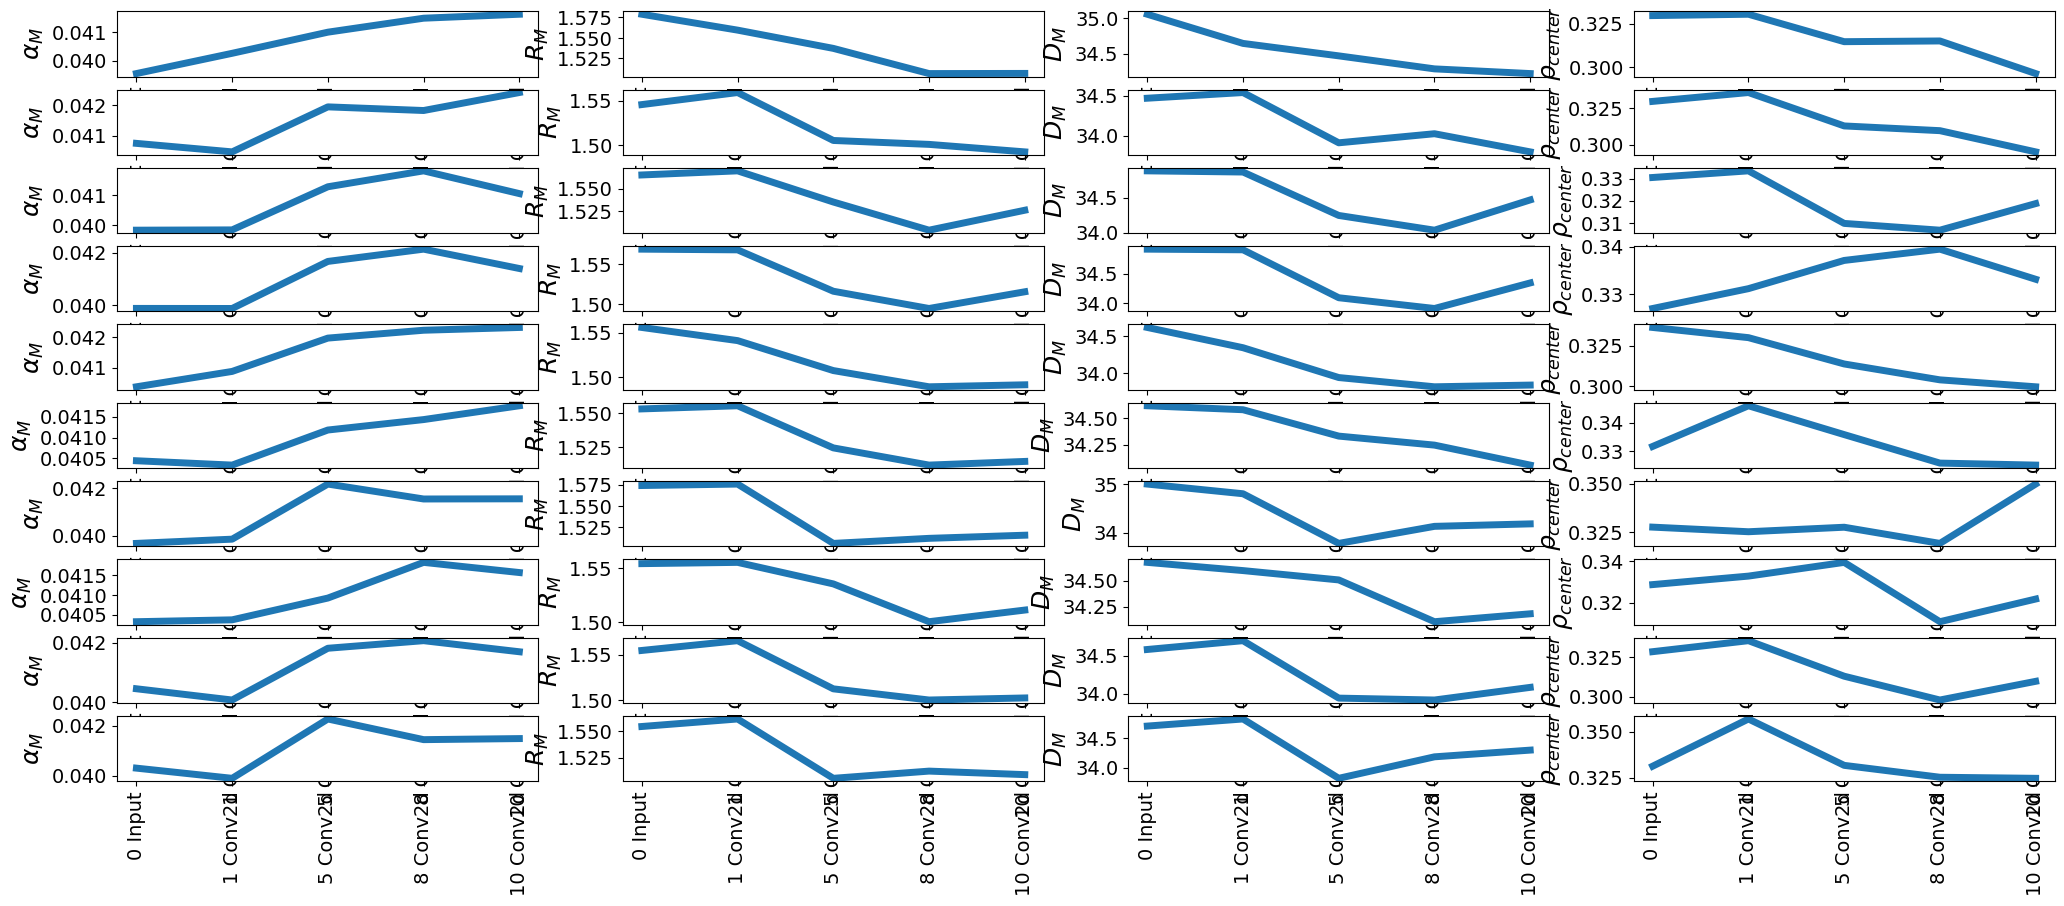

In [61]:
fig, axes = plt.subplots(10, 4, figsize=(25, 10), tight_layout=True)

for i in range(10):

    plot_data = torch.load("./plots/naive_CIFAR100/naive_CIFAR100_metrics.pth")[
        f"task_{i}"
    ]

    axes[i][0].plot(plot_data["capacities"], linewidth=5)
    axes[i][1].plot(plot_data["radii"], linewidth=5)
    axes[i][2].plot(plot_data["dimensions"], linewidth=5)
    axes[i][3].plot(plot_data["correlations"], linewidth=5)

    axes[i][0].set_ylabel(r"$\alpha_M$", fontsize=18)
    axes[i][1].set_ylabel(r"$R_M$", fontsize=18)
    axes[i][2].set_ylabel(r"$D_M$", fontsize=18)
    axes[i][3].set_ylabel(r"$\rho_{center}$", fontsize=18)

    names = plot_data["names"]
    names = [n.split("_")[1] + " " + n.split("_")[2] for n in names]
    for ax in axes[i]:
        ax.set_xticks([i for i, _ in enumerate(names)])
        ax.set_xticklabels(names, rotation=90, fontsize=16)
        ax.tick_params(axis="both", which="major", labelsize=14)

    # plot_data = torch.load("./plots/naive_CIFAR100/naive_CIFAR100_metrics.pth")["task_4"]

    # axes[0].plot(plot_data["capacities"], linewidth=5, label="task 9")
    # axes[1].plot(plot_data["radii"], linewidth=5)
    # axes[2].plot(plot_data["dimensions"], linewidth=5)
    # axes[3].plot(plot_data["correlations"], linewidth=5)

    # axes[0].set_ylabel(r"$\alpha_M$", fontsize=18)
    # axes[1].set_ylabel(r"$R_M$", fontsize=18)
    # axes[2].set_ylabel(r"$D_M$", fontsize=18)
    # axes[3].set_ylabel(r"$\rho_{center}$", fontsize=18)

    # names = plot_data["names"]
    # names = [n.split("_")[1] + " " + n.split("_")[2] for n in names]
    # for ax in axes:
    #     ax.set_xticks([i for i, _ in enumerate(names)])
    #     ax.set_xticklabels(names, rotation=90, fontsize=16)
    #     ax.tick_params(axis="both", which="major", labelsize=14)
    #     ax.legend()

plt.tight_layout()
plt.show()